In [ ]:
from google.colab import files
uploaded = files.upload()


SUBASRI R 24BAD116 SCENARIO 1
MSE : 6.2214468826180624
RMSE: 2.4942828393384064
R2  : 0.6492792001567064


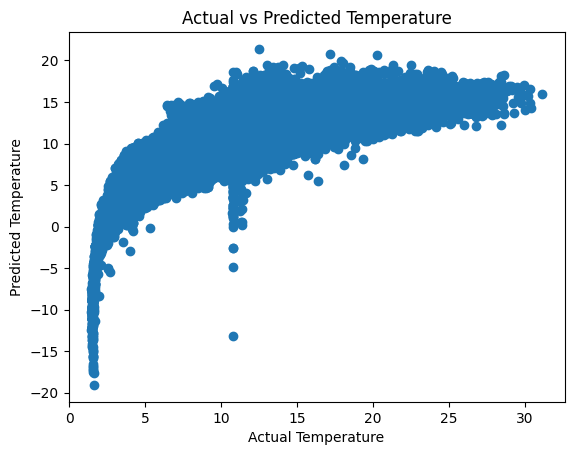

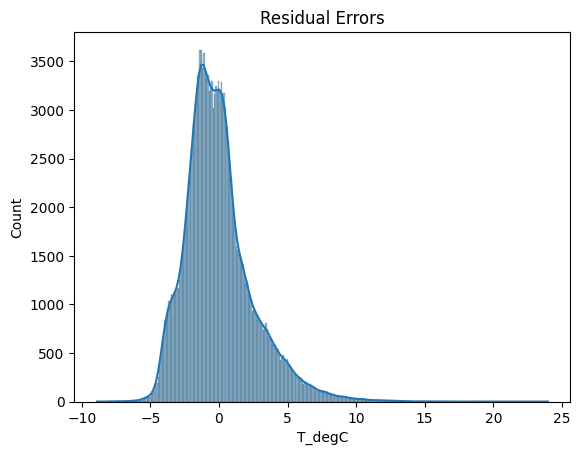

Ridge R2: 0.649279200458081
Lasso R2: 0.6492263454624063


In [ ]:
print("SUBASRI R 24BAD116 SCENARIO 1")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("bottle.csv", low_memory=False)

# Safe feature selection (no KeyError)
features = ['Depthm', 'Salnty', 'O2ml_L']
target = 'T_degC'

data = df[features + [target]]

# Handle missing values
data = data.fillna(data.mean())

X = data[features]
y = data[target]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluation
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2  :", r2_score(y_test, y_pred))

# Visualization
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature")
plt.show()

residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Errors")
plt.show()

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print("Ridge R2:", r2_score(y_test, ridge.predict(X_test)))

# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
print("Lasso R2:", r2_score(y_test, lasso.predict(X_test)))


In [ ]:
from google.colab import files
uploaded = files.upload()

SUBARI R 24BAD116 SCENARIO 2
Columns in dataset:
Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

Detected columns:
Open  : open
High  : high
Low   : low
Close : close
Volume: volume

Evaluation Metrics:
Accuracy : 0.5563093622795116
Precision: 0.0
Recall   : 0.0
F1 Score : 0.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


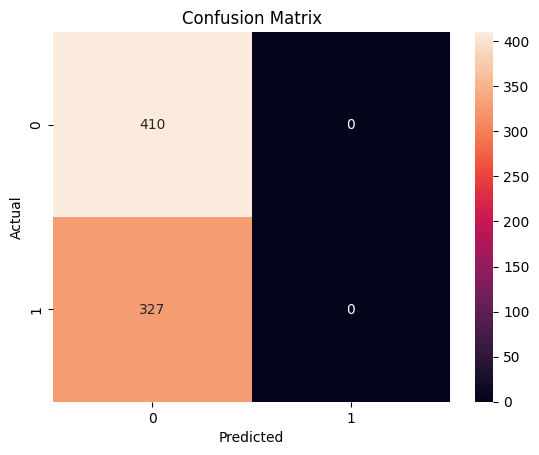

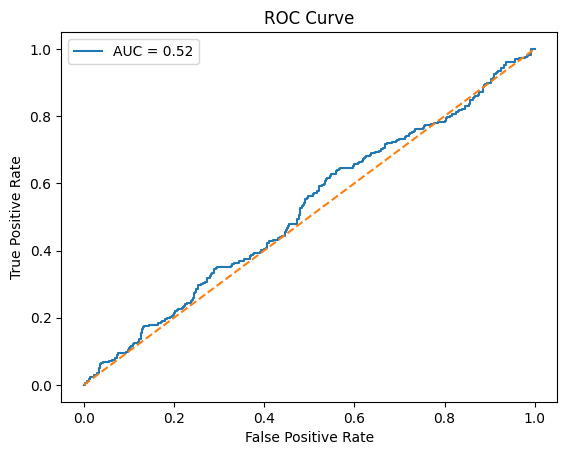

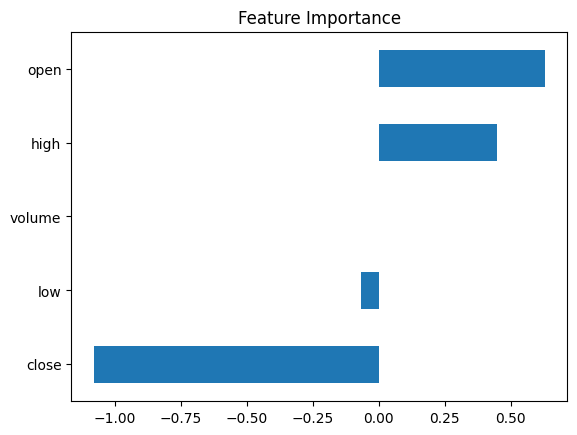

In [ ]:

print("SUBARI R 24BAD116 SCENARIO 2")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc

df = pd.read_csv("LICI - 10 minute data.csv")

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

print("Columns in dataset:")
print(df.columns)

def find_col(possible_names):
    for col in df.columns:
        for name in possible_names:
            if name in col:
                return col
    return None

open_col   = find_col(['open'])
high_col   = find_col(['high'])
low_col    = find_col(['low'])
close_col  = find_col(['close', 'last'])
volume_col = find_col(['volume', 'vol'])

print("\nDetected columns:")
print("Open  :", open_col)
print("High  :", high_col)
print("Low   :", low_col)
print("Close :", close_col)
print("Volume:", volume_col)

df['price_movement'] = np.where(
    df[close_col].shift(-1) > df[close_col], 1, 0
)

df.dropna(inplace=True)

X = df[[open_col, high_col, low_col, close_col, volume_col]]
y = df['price_movement']

X = X.fillna(X.mean())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("\nEvaluation Metrics:")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

importance = pd.Series(model.coef_[0], index=X.columns)
importance.sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()

